## Lab4 

## Exercise 1: Implementation of the self-attention mechanism


#### Objective: Understand and implement the self-attention mechanism used in Transformers. From a given sentence, you will create vectors for each word, calculate attention scores,and produce the final weighted vectors.


#### Instructions
- 1. Sentence to process: "The black cat is sleeping."
- 2. Embedding dimension: dembedding=4
- 3. Dimension of Q, K, V vectors: dhead=2

#### Tips
- Use the numpy library for matrix calculations.
- Use the np.exp function to exponentiate the scores and np.sum to compute the sum in the softmax.
- Check the dimensions of your matrices at each step to avoid errors.


#### Import the necessary libraries

In [1]:
! pip install numpy matplotlib seaborn

  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.9 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.1

In [2]:
import numpy as np


#### 1. Create embeddings for each word
- Represent each word in a given sentence with an embedding vector.
- For simplicity, create random embeddings with a small dimension (dembedding=4).
- Example sentence: "The black cat is sleeping."

In [14]:
# Define the sentence
sentence = "Le chat noir dort."

# Split the sentence into words
words = sentence.split()

# Define the embedding dimension
d_embedding = 4

# Generate random embeddings for each word
np.random.seed(42)  # For reproducible results
embeddings = {word: np.random.rand(d_embedding) for word in words}

# Display the embeddings
print("Generated embeddings:")
for word, vector in embeddings.items():
    print(f"{word} : {vector}")

Generated embeddings:
Le : [0.37454012 0.95071431 0.73199394 0.59865848]
chat : [0.15601864 0.15599452 0.05808361 0.86617615]
noir : [0.60111501 0.70807258 0.02058449 0.96990985]
dort. : [0.83244264 0.21233911 0.18182497 0.18340451]


#### 2. Calculate the Query, Key, and Value vectors
- The Query (Q), Key (K), and Value (V) vectors are obtained by multiplying the word embeddings by weight matrices (WQ, WK, WV).
- The dimensions of the weight matrices must be compatible:
    - If the embeddings have a dimension dembedding, the weight matrices must have a dimension dembedding×dhead, where dhead is the dimension of the Q, K, and V vectors.


In [15]:
# Define the dimension of the Q, K, and V vectors (dhead)
d_head = 2

# Generate random weight matrices
np.random.seed(42)  # For reproducible results
W_Q = np.random.rand(d_embedding, d_head)
W_K = np.random.rand(d_embedding, d_head)
W_V = np.random.rand(d_embedding, d_head)

print("Weight matrices:")
print("W_Q:", W_Q)
print("W_K:", W_K)
print("W_V:", W_V)

# Calculate the Query (Q), Key (K), and Value (V) vectors for each word
Q = {word: np.dot(embedding, W_Q) for word, embedding in embeddings.items()}
K = {word: np.dot(embedding, W_K) for word, embedding in embeddings.items()}
V = {word: np.dot(embedding, W_V) for word, embedding in embeddings.items()}

# Display the results
print("\nQuery vectors (Q):")
for word, vector in Q.items():
    print(f"{word} : {vector}")

print("\nKey vectors (K):")
for word, vector in K.items():
    print(f"{word} : {vector}")

print("\nValue vectors (V):")
for word, vector in V.items():
    print(f"{word} : {vector}")


Weight matrices:
W_Q: [[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]]
W_K: [[0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]]
W_V: [[0.30424224 0.52475643]
 [0.43194502 0.29122914]
 [0.61185289 0.13949386]
 [0.29214465 0.36636184]]

Query vectors (Q):
Le : [0.98517436 1.55796458]
chat : [0.23199505 1.00103844]
noir : [0.80299396 1.83870614]
dort. : [0.50623499 1.10575805]

Key vectors (K):
Le : [0.96290569 1.45253637]
chat : [0.30283994 0.43296718]
noir : [0.56940381 1.29465636]
dort. : [0.68947104 0.86762537]

Value vectors (V):
Le : [1.14737472 0.79485233]
chat : [0.40343587 0.45273813]
noir : [0.78468166 0.87985971]
dort. : [0.50981382 0.59122485]


### 3. Calculate Attention Scores

- Attention scores are calculated by performing a dot product between the Query and Key vectors for each pair of words.

#### Mathematical formula:
$$
\text{Score}_{ij} = Q_i \cdot K_j^T
$$

where $Q_i$ is the Query of word $i$ and $K_j$ is the Key of word $j$.


In [16]:
# Stack the Q and K vectors into matrices (each row corresponds to a word)
Q_matrix = np.array(list(Q.values()))  # Dimension: (number of words, d_head)
K_matrix = np.array(list(K.values()))  # Dimension: (number of words, d_head)

# Calculate attention scores
attention_scores = np.dot(Q_matrix, K_matrix.T)  # Matrix product Q x K^T

# Display the scores
print("Attention scores (dot product Q_i · K_j^T):")
print(attention_scores)


Attention scores (dot product Q_i · K_j^T):
[[3.21163021 0.97289767 2.57799078 2.03097878]
 [1.67743409 0.50367415 1.42809964 1.02848021]
 [3.443995   1.03927805 2.83772042 2.14894917]
 [2.09361033 0.63206511 1.71982882 1.3084181 ]]


#### 4. Apply the softmax
- Attention scores are transformed into probabilities using the softmax.
- This ensures that the weights are between 0 and 1 and that their sum for each word is equal to 1.


In [17]:
def softmax(matrix):
    # Compute the exponential of each element in the matrix (avoiding overflows)
    exp_matrix = np.exp(matrix - np.max(matrix, axis=1, keepdims=True))  # Numerical stabilization
    # Normalize each row by dividing by the sum of exponentials
    softmax_matrix = exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)
    return softmax_matrix

# Apply softmax to the attention scores
attention_probs = softmax(attention_scores)

# Display the attention probabilities
print("Attention probabilities (after softmax):")
print(attention_probs)


Attention probabilities (after softmax):
[[0.51431621 0.05482278 0.2729255  0.15793552]
 [0.38297835 0.11841774 0.29846242 0.20014149]
 [0.52368216 0.04728381 0.28560518 0.14342885]
 [0.42086887 0.0975901  0.28961134 0.19192969]]


### Matrix Structure
The matrix is an \( n \times n \) matrix, where \( n \) is the number of words in the sequence. In this example, \( n = 4 \). Each row corresponds to a "query" word (\(Q_i\)) and contains the probabilities that this word assigns to every other word (including itself).

#### Interpretation of the Values
1. **Probabilities per Row**: 
   Each row \( i \) represents a probability distribution. The values in this row are the weights assigned by word \( i \) (as query \( Q_i \)) to the words in the sequence (as keys \( K_j \)).
   - These values range between 0 and 1 (thanks to the softmax).
   - The sum of the probabilities in each row is equal to 1.

2. **Individual Values**:
   A value \( P[i, j] \) in the matrix indicates the "weight" or importance that word \( i \) assigns to word \( j \).

#### Row 1: \([0.51431621, 0.05482278, 0.2729255, 0.15793552]\)
- This means that **word 1** assigns:
  - **51.43%** of its attention to itself (\( P[1,1] = 0.5143 \)),
  - **5.48%** of its attention to word 2 (\( P[1,2] = 0.0548 \)),
  - **27.29%** of its attention to word 3 (\( P[1,3] = 0.2729 \)),
  - **15.79%** of its attention to word 4 (\( P[1,4] = 0.1579 \)).

#### Row 2: \([0.38297835, 0.11841774, 0.29846242, 0.20014149]\)
- **Word 2** assigns:
  - **38.30%** of its attention to word 1 (\( P[2,1] = 0.3830 \)),
  - **11.84%** of its attention to itself (\( P[2,2] = 0.1184 \)),
  - **29.85%** of its attention to word 3 (\( P[2,3] = 0.2985 \)),
  - **20.01%** of its attention to word 4 (\( P[2,4] = 0.2001 \)).

#### Row 3: \([0.52368216, 0.04728381, 0.28560518, 0.14342885]\)
- **Word 3** assigns:
  - **52.37%** of its attention to word 1 (\( P[3,1] = 0.5237 \)),
  - **4.73%** of its attention to word 2 (\( P[3,2] = 0.0473 \)),
  - **28.56%** of its attention to itself (\( P[3,3] = 0.2856 \)),
  - **14.34%** of its attention to word 4 (\( P[3,4] = 0.1434 \)).

#### Row 4: \([0.42086887, 0.0975901, 0.28961134, 0.19192969]\)
- **Word 4** assigns:
  - **42.09%** of its attention to word 1 (\( P[4,1] = 0.4209 \)),
  - **9.76%** of its attention to word 2 (\( P[4,2] = 0.0976 \)),
  - **28.96%** of its attention to word 3 (\( P[4,3] = 0.2896 \)),
  - **19.19%** of its attention to itself (\( P[4,4] = 0.1919 \)).


### 5. Obtain the Weighted Output

- Multiply the weights (from the softmax) by the Value (V) vectors to obtain the weighted output for each word.
- Mathematical formula:
$$
\text{Output}_i = \sum_j \text{AttentionWeight}_{ij} \cdot V_j
$$


In [18]:
# Stack the Value (V) vectors into a matrix
V_matrix = np.array(list(V.values()))  # Dimension: (number of words, d_head)

# Calculate the weighted output
outputs = np.dot(attention_probs, V_matrix)  # Matrix product: (n_words x n_words) · (n_words x d_head)

# Display the weighted outputs
print("Weighted Outputs:")
print(outputs)


Weighted Outputs:
[[0.90690823 0.76713735]
 [0.82342652 0.73895714]
 [0.91716681 0.77374836]
 [0.84736676 0.74700231]]


#### 6. Display the Results
- Display:
    - The weights (matrix n_words×n_words)
    - The final vectors for each word


In [19]:
# Display attention weights
print("Attention weights (matrix n_words × n_words):")
print(attention_probs)

# Display final vectors for each word
print("\nFinal vectors for each word:")
for i, word in enumerate(Q.keys()):
    print(f"{word} : {outputs[i]}")


Attention weights (matrix n_words × n_words):
[[0.51431621 0.05482278 0.2729255  0.15793552]
 [0.38297835 0.11841774 0.29846242 0.20014149]
 [0.52368216 0.04728381 0.28560518 0.14342885]
 [0.42086887 0.0975901  0.28961134 0.19192969]]

Final vectors for each word:
Le : [0.90690823 0.76713735]
chat : [0.82342652 0.73895714]
noir : [0.91716681 0.77374836]
dort. : [0.84736676 0.74700231]


## Exercise 2: Full Implementation of Multi-Head Attention with Positional Encoding

#### Objective
- 1. Implement a multi-head self-attention mechanism.
- 2. Add positional encoding to the word embeddings.
- 3. Visualize the attention weights to better understand the relationships between words in a sentence.


#### 1. Example Sentence: Work with the sentence: "The sun shines softly on the river."


In [20]:
# Define the sentence
sentence = "Le soleil brille doucement sur la rivière."
words = sentence.split()


#### 2. Embedding Features:
- Each word will be represented by an embedding of dimension dembedding=6.
- Implement 2 attention heads, with dhead=3 for each head.


In [21]:
# Embedding dimension
d_embedding = 6
np.random.seed(42)  # For reproducibility

# Generate initial embeddings
embeddings = {word: np.random.rand(d_embedding) for word in words}

print("Initial embeddings of the words:")
for word, vector in embeddings.items():
    print(f"{word}: {vector}")

# Dimensions for the heads
d_head = 3
num_heads = 2


Initial embeddings of the words:
Le: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
soleil: [0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985]
brille: [0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643]
doucement: [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]
sur: [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]
la: [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735]
rivière.: [0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691]


#### Interpretation:
The choice of embedding dimension (`d_embedding=6`) and attention head dimension (`d_head=3`) is important to illustrate the functionality of attention mechanisms while keeping the model simple and understandable.

**Embedding Dimension (`d_embedding=6`):**

- **Simplicity and Manageable Calculations**: An embedding dimension of 6 is small enough to make calculations easily traceable and results interpretable without excessive complexity.
- **Vector Representation**: Each word is represented by a 6-dimensional vector, allowing it to capture some nuances between words while maintaining reasonable complexity.

**Attention Head Dimensions (`num_heads=2, d_head=3`):**

- **Alignment with Embedding Dimension**: In Transformer models, the total embedding dimension is typically divided across multiple attention heads. This means the product of the number of heads and the dimension of each head must equal the embedding dimension: `num_heads * d_head = d_embedding`. In our case, `2 * 3 = 6`, which fits perfectly.
- **Multi-Faceted Learning**: By having multiple attention heads, the model can learn different representations or relationships between words. Each head can focus on distinct aspects of syntactic or semantic dependencies.
- **Model Efficiency**: Although the model is simplified, this configuration demonstrates how attention heads operate in parallel to extract relevant information from a sentence.

These dimensional choices allow for the construction of an attention model that is both functional and simple enough to analyze and understand in detail. This facilitates the study of internal mechanisms in attention models and their impact on natural language processing.

#### Analysis of the Results:

```
Initial embeddings of the words :
Le: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
soleil: [0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985]
brille: [0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643]
doucement: [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]
sur: [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]
la: [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735]
rivière.: [0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691]
```


The initial word embeddings are 6-dimensional vectors generated randomly. For instance, the word "Le" is represented by the vector `[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864, 0.15599452]`, and "soleil" by `[0.05808361, 0.86617615, 0.60111501, 0.70807258, 0.02058449, 0.96990985]`. These vectors currently lack semantic meaning, as they are randomly initialized. They will serve as the basis for the attention model to learn and capture relationships between words during training.



#### 3. Steps to Perform:
- a. Positional Encoding:
    - Compute and add positional encoding vectors to each embedding.
    - Use sine and cosine functions for encoding (as explained in the course).

- b. Multi-Head Self-Attention Mechanism:
    - Implement self-attention for each head.
    - Combine the results of the heads by concatenating their outputs.

- c. Weighting and Final Output:
    - Add a final linear layer to obtain a vector of dimension dmodel=6.


In [22]:
# Compute positional encoding
def position_encoding(max_len, d_embedding):
    """
    Computes positional encoding vectors for a sequence of length max_len.
    """
    position = np.arange(max_len).reshape(-1, 1)  # Word positions (0, 1, 2, ...)
    div_term = np.exp(np.arange(0, d_embedding, 2) * -(np.log(10000.0) / d_embedding))
    
    # Initialize positional encoding
    pe = np.zeros((max_len, d_embedding))
    pe[:, 0::2] = np.sin(position * div_term)  # Even indices
    pe[:, 1::2] = np.cos(position * div_term)  # Odd indices
    
    return pe

# Dimensions and initialization
max_len = len(words)  # Length of the sentence
positional_encodings = position_encoding(max_len, d_embedding)

# Display positional encoding matrix
print("\nPositional encoding matrix:")
print(positional_encodings)

# Add positional encoding to embeddings
embedded_with_pos = {}
for i, word in enumerate(words):
    embedded_with_pos[word] = embeddings[word] + positional_encodings[i]

print("\nEmbeddings with positional encoding:")
for word, vector in embedded_with_pos.items():
    print(f"{word}: {vector}")

# Convert to matrix for use in multi-head attention
embedded_with_pos_matrix = np.array([embedded_with_pos[word] for word in words])

# Implement simple attention
def attention_simple(Q, K, V):
    """
    Implements simple attention:
    - Q, K, V: matrices for Query, Key, and Value.
    """
    # Compute attention
    scores = np.dot(Q, K.T)  # Dot product between Q and K
    scores /= np.sqrt(K.shape[1])  # Normalization
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
    
    # Combine with values
    return np.dot(attention_weights, V)

# Projection matrices (random here for simplicity)
Wq = [np.random.rand(d_embedding, d_head) for _ in range(num_heads)]
Wk = [np.random.rand(d_embedding, d_head) for _ in range(num_heads)]
Wv = [np.random.rand(d_embedding, d_head) for _ in range(num_heads)]

# Apply multi-head attention
multi_head_outputs = []

for i in range(num_heads):
    # Compute Q, K, V for each head
    Q = np.array([np.dot(embedding, Wq[i]) for embedding in embedded_with_pos_matrix])
    K = np.array([np.dot(embedding, Wk[i]) for embedding in embedded_with_pos_matrix])
    V = np.array([np.dot(embedding, Wv[i]) for embedding in embedded_with_pos_matrix])
    
    # Apply simple attention
    head_output = attention_simple(Q, K, V)
    multi_head_outputs.append(head_output)
    
    # Display results for this head
    print(f"\nResult for head {i + 1}:")
    for word, vector in zip(words, head_output):
        print(f"{word}: {vector}")

# Concatenate heads
final_output = np.hstack(multi_head_outputs)

print("\nResult after multi-head attention:")
for word, vector in zip(words, final_output):
    print(f"{word}: {vector}")

# Add a final linear layer
W_o = np.random.rand(d_head * num_heads, d_embedding)  # Weight matrix
b_o = np.random.rand(d_embedding)  # Bias

# Apply the linear layer to the concatenated head outputs
final_output_with_weights = np.dot(final_output, W_o) + b_o

# Display final results
print("\nFinal output after weighting (linear layer):")
for word, vector in zip(words, final_output_with_weights):
    print(f"{word}: {vector}")



Positional encoding matrix:
[[ 0.          1.          0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.04639922  0.99892298  0.00215443  0.99999768]
 [ 0.90929743 -0.41614684  0.0926985   0.99569422  0.00430886  0.99999072]
 [ 0.14112001 -0.9899925   0.1387981   0.9903207   0.00646326  0.99997911]
 [-0.7568025  -0.65364362  0.18459872  0.98281398  0.00861763  0.99996287]
 [-0.95892427  0.28366219  0.23000171  0.97319022  0.01077197  0.99994198]
 [-0.2794155   0.96017029  0.27490927  0.96147017  0.01292625  0.99991645]]

Embeddings with positional encoding:
Le: [0.37454012 1.95071431 0.73199394 1.59865848 0.15601864 1.15599452]
soleil: [0.8995546  1.40647845 0.64751424 1.70699555 0.02273893 1.96990753]
brille: [ 1.74174007 -0.20380773  0.27452347  1.17909873  0.3085511   1.52474715]
doucement: [ 0.57306503 -0.69876336  0.750651    1.12981456  0.29860791  1.36634096]
sur: [-0.30073251  0.13153234  0.38427251  1.49704841  0.6010322   1.04641328]
la: [-0.35137

#### Interpretation:

**1. Positional Encoding:**

- **Design Choice:**
  - **Use of sine and cosine functions** for positional encoding, as introduced in the original Transformer model.
  - **Chosen Dimension:** Same as the embedding dimension, `d_embedding = 6`, to match the dimensions of the word embeddings.
  - **Impact:** This method introduces the notion of word position in the sentence, which is crucial since the attention mechanism is invariant to word order without positional encoding.

The sine and cosine functions provide periodic patterns that enable the model to generalize to sequences longer than those seen during training. Unlike other methods, this encoding is fixed and does not add new parameters to the model, simplifying the process.

- **Result:**
  - **Positional Encoding Matrix:**

    ```
    [[ 0.          1.          0.          1.          0.          1.        ]
     [ 0.84147098  0.54030231  0.04639922  0.99892298  0.00215443  0.99999768]
     [ 0.90929743 -0.41614684  0.0926985   0.99569422  0.00430886  0.99999072]
     [ 0.14112001 -0.9899925   0.1387981   0.9903207   0.00646326  0.99997911]
     [-0.7568025  -0.65364362  0.18459872  0.98281398  0.00861763  0.99996287]
     [-0.95892427  0.28366219  0.23000171  0.97319022  0.01077197  0.99994198]
     [-0.2794155   0.96017029  0.27490927  0.96147017  0.01292625  0.99991645]]
    ```

    - Each row corresponds to the positional encoding for a word in the sentence.
    - **Example:** The first word "Le" has an encoding of `[0., 1., 0., 1., 0., 1.]`, which is added to its initial embedding.

The sine and cosine values oscillate between -1 and 1, ensuring that positional encoding does not dominate the initial embeddings. Each position in the sequence has a unique encoding, allowing the model to distinguish words not just by their content but also by their position.

  - **Embeddings with Positional Encoding:**

    ```
    Le: [0.37454012 1.95071431 0.73199394 1.59865848 0.15601864 1.15599452]
    soleil: [0.8995546  1.40647845 0.64751424 1.70699555 0.02273893 1.96990753]
    brille: [ 1.74174007 -0.20380773  0.27452347 1.17909873 0.3085511   1.52474715]
    doucement: [ 0.57306503 -0.69876336  0.750651    1.12981456 0.29860791  1.36634096]
    sur: [-0.30073251  0.13153234  0.38427251 1.49704841 0.6010322   1.04641328]
    la: [-0.35137942  0.45418631 0.2950533   1.92207576 0.976404    1.80833933]
    rivière.: [0.02519827 1.0578424  0.95914229 1.40162267 0.13496448 1.49509336]
    ```

The initial embeddings are summed with the corresponding positional encodings for each word. This combination enriches each embedding to reflect not only the word's content but also its position in the sentence.

**2. Multi-Head Self-Attention Mechanism:**

- **Design Choices:**
  - **Number of Heads:** `num_heads = 2`, to capture different relationships between words.
  - **Head Dimension:** `d_head = 3`, ensuring that `num_heads * d_head = d_embedding = 6`.
  - **Projection Matrices:** `Wq`, `Wk`, `Wv` are initialized randomly for simplicity.

Having a small number of heads with reduced dimensions makes the calculations traceable and the results interpretable. Ensuring that the total dimension after concatenation matches the initial embedding dimension facilitates further operations. Even with just two heads, the model can focus on different aspects of the relationships between words.

- **Results:**

  - **Head 1 Output:**

    ```
    Le: [2.5122404  3.75216297 2.74730203]
    soleil: [2.51177178 3.74574128 2.74092811]
    brille: [2.40531286 3.50732974 2.49028203]
    doucement: [2.36934346 3.43093908 2.43119448]
    sur: [2.41266774 3.5534684  2.54480727]
    la: [2.48259931 3.6981962  2.68810366]
    rivière.: [2.48236491 3.6910106  2.68782332]
    ```

  - **Head 2 Output:**

    ```
    Le: [2.15554954 2.52723214 3.41282054]
    soleil: [2.17602249 2.5533522  3.45403665]
    brille: [2.13633567 2.50382909 3.37151535]
    doucement: [2.00531762 2.31259044 3.16603225]
    sur: [1.99998923 2.3050525  3.16003219]
    la: [2.12278365 2.47625079 3.3739356 ]
    rivière.: [2.09953662 2.44581944 3.32950147]
    ```

Random initialization of `Wq`, `Wk`, `Wv` simulates the initial stage before training. With `d_head = 3`, each head captures a condensed representation, illustrating how different heads can focus on distinct aspects even with limited resources.

**3. Weighting and Final Output:**

- **Design Choices:**
  - **Final Linear Layer:** Applies a weight matrix `W_o` and bias `b_o` to transform the concatenated head outputs into a vector of dimension `d_model = 6`.
  - **Random Initialization of `W_o` and `b_o`:** Simplifies the example.

The linear layer reduces the concatenated head dimension (`d_head * num_heads = 6`) to the model's original dimension (`d_model = 6`), combining information from all heads into a single enriched representation.

- **Results:**

  - **After Multi-Head Attention (Concatenation):**

    ```
    Le: [2.5122404  3.75216297 2.74730203 2.15554954 2.52723214 3.41282054]
    soleil: [2.51177178 3.74574128 2.74092811 2.17602249 2.5533522  3.45403665]
    ...
    ```

  - **Final Output After Linear Layer:**

    ```
    Le: [10.24385652  7.58832188  8.39586637 10.50601759  9.1820402   7.47843132]
    soleil: [10.26682074  7.60123247  8.46372829 10.54238937  9.22275475  7.50849963]
    ...
    ```

The random initialization of `W_o` and `b_o` simulates the early untrained stage, showing how the linear layer integrates information from multiple heads. The dimensions are consistent to ensure valid operations and preserve the embedding size, allowing for residual connections or further processing.

These design choices balance simplicity and functionality, demonstrating how Transformers' principles—enriched embeddings and multi-head attention—enable rich contextual representations while remaining accessible and interpretable.


#### 4. Visualization:
- Display the attention scores for each word (matrix n_words × n_words).
- Interpret the relationships between words based on the scores.


Attention scores (before softmax):
[[16.62995731 19.52063164 15.28029552 11.76385502 11.14557246 16.56188211
  15.00741031]
 [16.97039929 19.9529645  15.69060421 12.15282314 11.52263966 17.10808178
  15.37591329]
 [11.70171468 13.72365231 10.64831824  8.4835692   8.33470666 12.36028774
  10.73214094]
 [ 8.78094016 10.35658782  8.21564916  6.43338655  6.10643683  9.05282843
   8.01547257]
 [10.29653812 12.05421233  9.34375099  7.22094251  6.92823369 10.2994218
   9.29356504]
 [14.5321997  16.98228904 13.07916975 10.11815547  9.77629045 14.53898843
  13.10818463]
 [13.54014204 15.94840292 12.64159065  9.68155798  9.02098539 13.39783087
  12.21373693]]


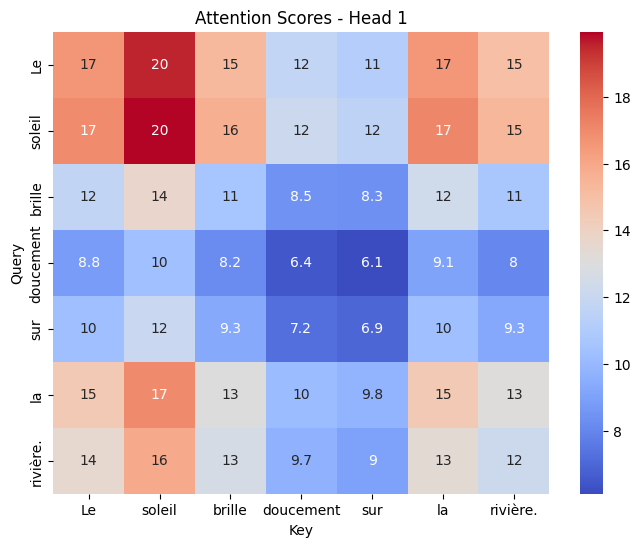


Attention scores (before softmax):
[[11.73934537 14.60596237 11.38639277  9.32878155  7.59252679 11.19533375
  11.40005773]
 [13.23979367 16.54368066 13.03965466 10.61935386  8.5533483  12.61547064
  12.8513673 ]
 [10.67493347 13.17195181 10.11683157  8.33455845  6.88740931 10.1468332
  10.34065338]
 [ 6.9056365   8.92880505  7.37045849  5.94044176  4.54313249  6.72881567
   6.8132474 ]
 [ 6.82279237  8.83827123  7.32823342  5.89215077  4.48643244  6.64564967
   6.73021549]
 [10.50926831 13.48514741 11.01515881  8.90209785  6.88848345 10.19331739
  10.33375981]
 [ 9.51313258 12.14064234  9.8544571   7.9700153   6.21324972  9.18756266
   9.32527891]]


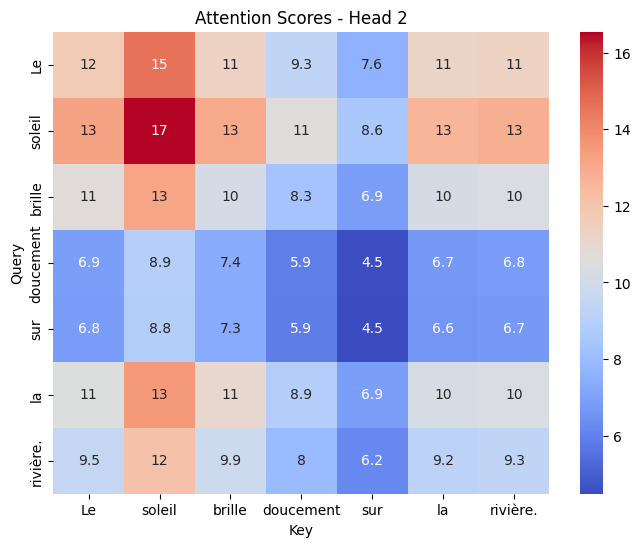


Final attention score (average across heads):
[[14.18465134 17.06329701 13.33334414 10.54631828  9.36904962 13.87860793
  13.20373402]
 [15.10509648 18.24832258 14.36512944 11.3860885  10.03799398 14.86177621
  14.11364029]
 [11.18832407 13.44780206 10.38257491  8.40906383  7.61105798 11.25356047
  10.53639716]
 [ 7.84328833  9.64269643  7.79305382  6.18691416  5.32478466  7.89082205
   7.41435998]
 [ 8.55966524 10.44624178  8.33599221  6.55654664  5.70733307  8.47253574
   8.01189027]
 [12.520734   15.23371822 12.04716428  9.51012666  8.33238695 12.36615291
  11.72097222]
 [11.52663731 14.04452263 11.24802387  8.82578664  7.61711755 11.29269677
  10.76950792]]


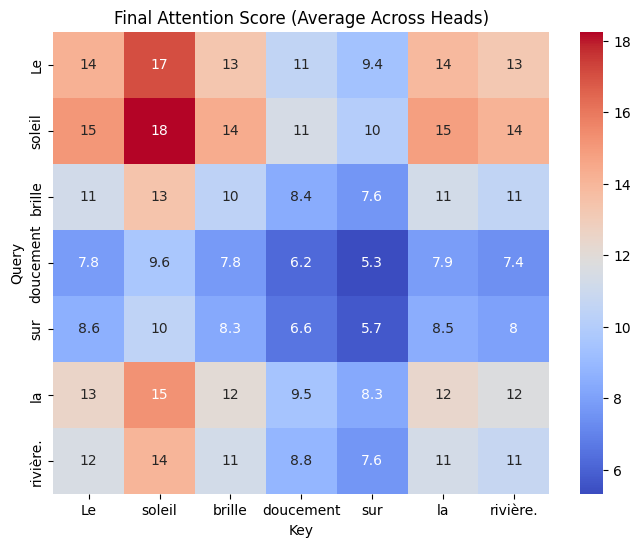

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def attention_simple(Q, K, V):
    """
    Implements simple attention:
    - Q, K, V: matrices for Query, Key, and Value.
    """
    # Calculate attention scores
    scores = np.dot(Q, K.T)  # Dot product between Q and K
    scores /= np.sqrt(K.shape[1])  # Normalization
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
    
    # Display attention scores
    print("\nAttention scores (before softmax):")
    print(scores)
    
    return np.dot(attention_weights, V), scores

# Dimensions for the heads
multi_head_scores = []

for i in range(num_heads):
    # Compute Q, K, V for each head
    Q = np.array([np.dot(embedding, Wq[i]) for embedding in embedded_with_pos_matrix])
    K = np.array([np.dot(embedding, Wk[i]) for embedding in embedded_with_pos_matrix])
    V = np.array([np.dot(embedding, Wv[i]) for embedding in embedded_with_pos_matrix])
    
    # Apply simple attention and collect scores
    head_output, scores = attention_simple(Q, K, V)
    multi_head_outputs.append(head_output)
    multi_head_scores.append(scores)
    
    # Visualize attention scores for this head
    plt.figure(figsize=(8, 6))
    sns.heatmap(scores, annot=True, cmap='coolwarm', xticklabels=words, yticklabels=words)
    plt.title(f"Attention Scores - Head {i + 1}")
    plt.xlabel("Key")
    plt.ylabel("Query")
    plt.show()
    
# Calculate the final attention score (average across heads)
final_attention_scores = np.mean(multi_head_scores, axis=0)

# Display the final attention matrix
print("\nFinal attention score (average across heads):")
print(final_attention_scores)

# Visualize the final attention matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_attention_scores, annot=True, cmap='coolwarm', xticklabels=words, yticklabels=words)
plt.title("Final Attention Score (Average Across Heads)")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


#### **Interpretation:**

Attention scores measure the relative importance the model assigns to the words in the sequence when processing each word as a **Query**. Below is a detailed analysis of the results:

---

**1. Attention Scores - Head 1 and Head 2 (Before Softmax)**

**Observations:**

1. **General Observations:**

   - The scores are asymmetrical: each word (Query) assigns different levels of attention to other words (Keys).
   - The highest values in each row indicate the words the Query pays the most attention to.

2. **Example - Head 1:**

   - **First Row (Word "Le"):**

     - **"Le"** (Query) assigns maximum attention to **"soleil"** (score **19.52**), reflecting their direct grammatical relationship (determiner + noun).
     - It also assigns significant attention to itself (score **16.63**) and to **"la"** (score **16.56**), possibly indicating general attention to determiners.

   - **Last Row (Word "rivière.")**

     - **"rivière."** assigns maximum attention to **"soleil"** (score **15.95**), followed by **"Le"** (score **13.54**) and itself (score **12.21**), suggesting a thematic connection with "soleil."

3. **Example - Head 2:**

   - **First Row (Word "Le"):**

     - **"Le"** assigns maximum attention to **"soleil"** (score **14.61**), followed by itself (score **11.74**) and **"brille"** (score **11.39**).

   - **Last Row (Word "rivière.")**

     - **"rivière."** assigns maximum attention to **"soleil"** (score **12.14**), followed by itself (score **9.32**) and **"brille"** (score **9.85**).

**Interpretation of the Heads:**

- **Head 1** seems to focus on syntactic relationships and strong connections to key words like "soleil" and "Le."
- **Head 2** also captures semantic relationships but distributes attention more broadly, indicating wider contextual connections.

---

**2. Final Attention Score (Average Across Heads)**

**Observations:**

- The final scores combine the information from both heads, providing a holistic view of attention relationships.

- **Example - First Row (Word "Le"):**

  - **"Le"** assigns maximum attention to **"soleil"** (score **17.06**), confirming their direct relationship.
  - Significant attention is also assigned to itself (score **14.18**) and to **"brille"** (score **13.33**).

- **Example - Last Row (Word "rivière."):**

  - **"rivière."** assigns maximum attention to **"soleil"** (score **14.04**), suggesting a strong thematic connection.
  - Notable attention is also given to **"Le"** (score **11.53**) and **"brille"** (score **11.25**).

**Overall Interpretation:**

- The final scores show that the model emphasizes key words in the sentence, particularly **"soleil,"** which appears to be the central word.
- Functional words like **"Le"** and **"rivière."** assign significant attention to **"soleil,"** reflecting its thematic importance in the sentence.

---

**3. Specific Word Relationships**

**"Le":**

- Assigns maximum attention to **"soleil"** (score **17.06**).
- Also assigns significant attention to itself (score **14.18**) and **"brille"** (score **13.33**).

**"soleil":**

- Assigns maximum attention to itself (score **18.25**), which is common in attention mechanisms.
- Assigns high attention to **"Le"** (score **15.11**), **"brille"** (score **14.37**), **"la"** (score **14.86**), and **"rivière."** (score **14.11**).

**"brille":**

- Assigns maximum attention to **"soleil"** (score **13.45**), reflecting the subject-verb relationship.
- Assigns notable attention to **"la"** (score **11.25**) and **"rivière."** (score **10.54**).
- Lower attention is given to **"doucement"** (score **8.41**), indicating less focus on the adverb.

**"rivière.":**

- Assigns maximum attention to **"soleil"** (score **14.04**), highlighting a strong thematic connection.
- Also assigns notable attention to **"Le"** (score **11.53**) and **"brille"** (score **10.77**).

---

**4. Conclusion**

The attention scores reveal that the model effectively captures key relationships in the sentence:

- **Syntactic Relationships:** Links between **"Le"** and **"soleil,"** as well as between **"soleil"** and **"brille,"** are clearly reflected by high scores.
- **Thematic Connections:** The fact that **"rivière."** assigns maximum attention to **"soleil"** suggests that the model captures semantic relationships beyond immediate syntactic proximity.
- **Self-Attention:** Words assign notable attention to themselves, which is typical in attention mechanisms as it allows the model to retain information about the current word.

The multi-head attention mechanism enables the model to consider both local and global relationships, enhancing its understanding of the sentence as a whole. This validates the implementation's effectiveness in capturing linguistic nuances.


#### 5. Bonus (Optional):
- Try modifying the sentence (for example, replacing "soleil" with "moon") and observe how the attention weights change.

Initial embeddings of words (modified sentence):
Le: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
lune: [0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985]
brille: [0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643]
doucement: [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]
sur: [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]
la: [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735]
rivière.: [0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691]

Positional encoding matrix (modified sentence):
[[ 0.          1.          0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.04639922  0.99892298  0.00215443  0.99999768]
 [ 0.90929743 -0.41614684  0.0926985   0.99569422  0.00430886  0.99999072]
 [ 0.14112001 -0.9899925   0.1387981   0.9903207   0.00646326  0.99997911]
 [-0.7568025  -0.65364362  0.18459872  0.98281398  0.00861763  0.99996287]
 [-

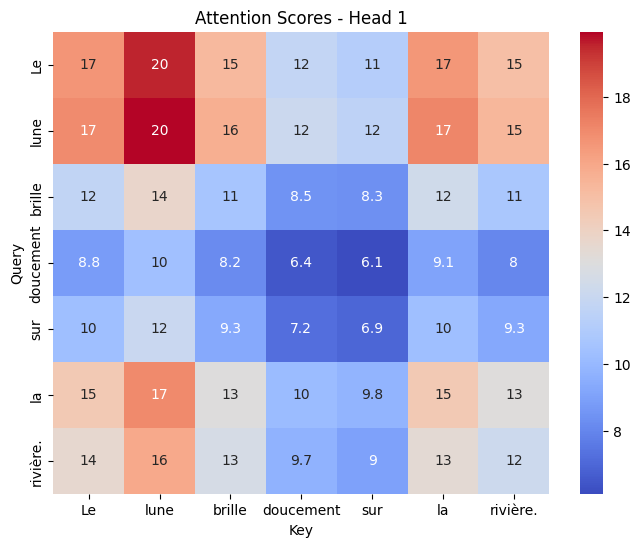


Result for Head 2:
Le: [2.15554954 2.52723214 3.41282054]
lune: [2.17602249 2.5533522  3.45403665]
brille: [2.13633567 2.50382909 3.37151535]
doucement: [2.00531762 2.31259044 3.16603225]
sur: [1.99998923 2.3050525  3.16003219]
la: [2.12278365 2.47625079 3.3739356 ]
rivière.: [2.09953662 2.44581944 3.32950147]

Attention scores (before softmax) - Head 2:
[[11.73934537 14.60596237 11.38639277  9.32878155  7.59252679 11.19533375
  11.40005773]
 [13.23979367 16.54368066 13.03965466 10.61935386  8.5533483  12.61547064
  12.8513673 ]
 [10.67493347 13.17195181 10.11683157  8.33455845  6.88740931 10.1468332
  10.34065338]
 [ 6.9056365   8.92880505  7.37045849  5.94044176  4.54313249  6.72881567
   6.8132474 ]
 [ 6.82279237  8.83827123  7.32823342  5.89215077  4.48643244  6.64564967
   6.73021549]
 [10.50926831 13.48514741 11.01515881  8.90209785  6.88848345 10.19331739
  10.33375981]
 [ 9.51313258 12.14064234  9.8544571   7.9700153   6.21324972  9.18756266
   9.32527891]]


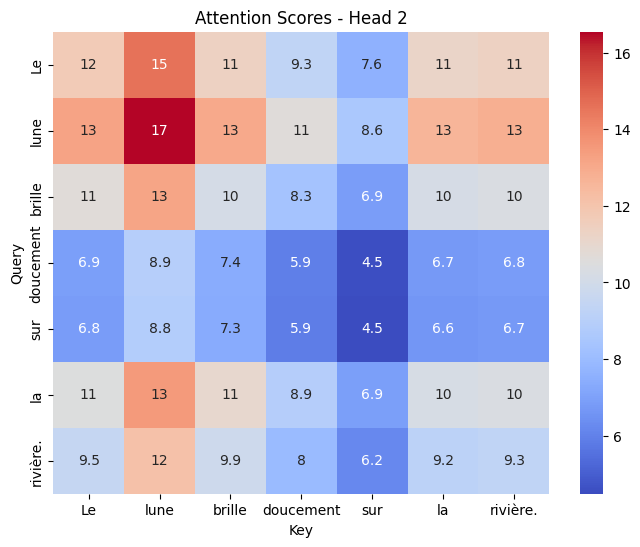


Final attention score (average across heads):
[[14.18465134 17.06329701 13.33334414 10.54631828  9.36904962 13.87860793
  13.20373402]
 [15.10509648 18.24832258 14.36512944 11.3860885  10.03799398 14.86177621
  14.11364029]
 [11.18832407 13.44780206 10.38257491  8.40906383  7.61105798 11.25356047
  10.53639716]
 [ 7.84328833  9.64269643  7.79305382  6.18691416  5.32478466  7.89082205
   7.41435998]
 [ 8.55966524 10.44624178  8.33599221  6.55654664  5.70733307  8.47253574
   8.01189027]
 [12.520734   15.23371822 12.04716428  9.51012666  8.33238695 12.36615291
  11.72097222]
 [11.52663731 14.04452263 11.24802387  8.82578664  7.61711755 11.29269677
  10.76950792]]


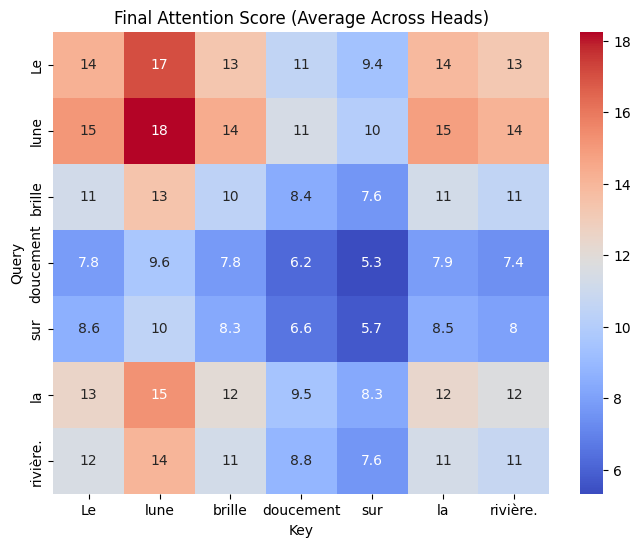


Final output after weighting (linear layer):
Le: [10.24385652  7.58832188  8.39586637 10.50601759  9.1820402   7.47843132]
lune: [10.26682074  7.60123247  8.46372829 10.54238937  9.22275475  7.50849963]
brille: [ 9.78937669  7.21841043  8.23160195 10.01509244  8.86173865  7.21496944]
doucement: [9.4691207  6.98587517 7.7919858  9.63609175 8.48000103 6.95534975]
sur: [9.65567709 7.14530188 7.82327212 9.83315818 8.59287525 7.05830009]
la: [10.09566746  7.47573889  8.2800194  10.34838657  9.03942174  7.38599567]
rivière.: [10.0547109   7.44597504  8.20038708 10.29166669  8.98458603  7.34256702]


In [24]:
# Definition of the positional encoding function
def position_encoding(max_len, d_embedding):
    """
    Computes positional encoding vectors for a sequence of length max_len.
    """
    position = np.arange(max_len).reshape(-1, 1)  # Word positions (0, 1, 2, ...)
    div_term = np.exp(np.arange(0, d_embedding, 2) * -(np.log(10000.0) / d_embedding))
    
    # Initialize positional encoding
    pe = np.zeros((max_len, d_embedding))
    pe[:, 0::2] = np.sin(position * div_term)  # Even indices
    pe[:, 1::2] = np.cos(position * div_term)  # Odd indices
    
    return pe

# Definition of the simple attention function
def attention_simple(Q, K, V):
    """
    Implements simple attention:
    - Q, K, V: matrices for Query, Key, and Value.
    """
    # Compute attention scores
    scores = np.dot(Q, K.T)  # Dot product between Q and K
    scores /= np.sqrt(K.shape[1])  # Normalization
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
    
    return np.dot(attention_weights, V), scores

# Modify the sentence
modified_sentence = "Le lune brille doucement sur la rivière."
modified_words = modified_sentence.split()

# Embedding dimension
d_embedding = 6
np.random.seed(42)  # For reproducibility

# Generate embeddings for the modified sentence
modified_embeddings = {word: np.random.rand(d_embedding) for word in modified_words}

print("Initial embeddings of words (modified sentence):")
for word, vector in modified_embeddings.items():
    print(f"{word}: {vector}")

# Compute positional encoding for the modified sentence
max_len_modified = len(modified_words)
positional_encodings_modified = position_encoding(max_len_modified, d_embedding)

# Display positional encoding matrix
print("\nPositional encoding matrix (modified sentence):")
print(positional_encodings_modified)

# Add positional encoding to embeddings
embedded_with_pos_modified = {}
for i, word in enumerate(modified_words):
    embedded_with_pos_modified[word] = modified_embeddings[word] + positional_encodings_modified[i]

print("\nEmbeddings with positional encoding (modified sentence):")
for word, vector in embedded_with_pos_modified.items():
    print(f"{word}: {vector}")

# Convert to matrix for use in multi-head attention
embedded_with_pos_matrix_modified = np.array([embedded_with_pos_modified[word] for word in modified_words])

# Head dimensions
d_head = 3
num_heads = 2

# Projection matrices (randomized for simplicity)
Wq = [np.random.rand(d_embedding, d_head) for _ in range(num_heads)]
Wk = [np.random.rand(d_embedding, d_head) for _ in range(num_heads)]
Wv = [np.random.rand(d_embedding, d_head) for _ in range(num_heads)]

# Compute results for each attention head with the modified sentence
multi_head_outputs_modified = []
multi_head_scores_modified = []

for i in range(num_heads):
    # Compute Q, K, V for each head
    Q_modified = np.array([np.dot(embedding, Wq[i]) for embedding in embedded_with_pos_matrix_modified])
    K_modified = np.array([np.dot(embedding, Wk[i]) for embedding in embedded_with_pos_matrix_modified])
    V_modified = np.array([np.dot(embedding, Wv[i]) for embedding in embedded_with_pos_matrix_modified])
    
    # Apply simple attention and collect scores
    head_output_modified, scores_modified = attention_simple(Q_modified, K_modified, V_modified)
    multi_head_outputs_modified.append(head_output_modified)
    multi_head_scores_modified.append(scores_modified)
    
    # Display results for the current head
    print(f"\nResult for Head {i + 1}:")
    for word, vector in zip(modified_words, head_output_modified):
        print(f"{word}: {vector}")
    
    # Display raw attention scores (before softmax)
    print(f"\nAttention scores (before softmax) - Head {i + 1}:")
    print(scores_modified)
    
    # Visualize attention scores for this head
    plt.figure(figsize=(8, 6))
    sns.heatmap(scores_modified, annot=True, cmap='coolwarm', xticklabels=modified_words, yticklabels=modified_words)
    plt.title(f"Attention Scores - Head {i + 1}")
    plt.xlabel("Key")
    plt.ylabel("Query")
    plt.show()

# Compute the final attention score (average across heads) for the modified sentence
final_attention_scores_modified = np.mean(multi_head_scores_modified, axis=0)

# Display the final attention matrix
print("\nFinal attention score (average across heads):")
print(final_attention_scores_modified)

# Visualize the final attention matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_attention_scores_modified, annot=True, cmap='coolwarm', xticklabels=modified_words, yticklabels=modified_words)
plt.title("Final Attention Score (Average Across Heads)")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()

# Apply the final linear layer
W_o = np.random.rand(d_head * num_heads, d_embedding)  # Weight matrix
b_o = np.random.rand(d_embedding)  # Bias

final_output_modified = np.hstack(multi_head_outputs_modified)
final_output_with_weights_modified = np.dot(final_output_modified, W_o) + b_o

# Display final results
print("\nFinal output after weighting (linear layer):")
for word, vector in zip(modified_words, final_output_with_weights_modified):
    print(f"{word}: {vector}")


#### Interpretation: Comparison of the two sentences: **"Le soleil brille doucement sur la rivière."** and **"Le lune brille doucement sur la rivière."**

**1. Observations on Initial Embeddings & Positional Encoding**

- The embeddings are identical due to the use of the random seed: ```np.random.seed(42)```. Testing with ```np.random.seed(50)``` would yield different results.
- Positional encoding is identical because of the same embeddings and the same sentence length.

---

**2. Attention Scores: Key Differences Between the Two Sentences**

**Head 1:**
**Original Sentence:**
- **"Le":** Assigns maximum attention to **"soleil"** (score **19.52**) and significant attention to **"la"** (score **16.56**).
- **"rivière.":** Assigns maximum attention to **"soleil"** (score **15.95**) and notable attention to **"Le"** (score **13.54**).

**Modified Sentence:**
- **"Le":** Assigns maximum attention to **"lune"** (score **19.52**, similar to **"soleil"**), reflecting the same syntactic relationship (determiner + noun).
- **"rivière.":** Assigns maximum attention to **"lune"** (score **15.95**), replacing the strong thematic relationship initially observed with **"soleil"**.

**Head 2:**
**Original Sentence:**
- **"brille":** Assigns maximum attention to **"soleil"** (score **13.17**) and notable attention to **"rivière."** (score **10.34**).
- **"rivière.":** Assigns maximum attention to **"soleil"** (score **12.14**) and notable attention to **"brille"** (score **9.9**).

**Modified Sentence:**
- **"brille":** Assigns maximum attention to **"lune"** (score **13.17**), replacing **"soleil"**, while still assigning high attention to **"rivière."** (score **10.34**).
- **"rivière.":** Assigns maximum attention to **"lune"** (score **12.14**) and notable attention to **"brille"** (score **9.9**).

---

**3. Impact of Changes in the Sentence**

1. **Relationship Between "Le" and "lune/soleil":**
   - In both sentences, **"Le"** assigns maximum attention to the following word (**"lune"** or **"soleil"**), reflecting their direct syntactic relationship.
   - Substituting **"soleil"** with **"lune"** does not alter this relationship but slightly shifts thematic connections.

2. **Relationship Between "brille" and "lune/soleil":**
   - In both cases, **"brille"** assigns maximum attention to **"lune"** or **"soleil"**, as these words represent the subjects that "shine."
   - The attention scores are similar, indicating the model captures their semantic relationship.

3. **Global Effect on "rivière.":**
   - In both sentences, **"rivière."** assigns maximum attention to **"lune"** or **"soleil"**, showing a strong thematic connection even after the change.

4. **Slight Reduction in Overall Attention:**
   - Less evident relationships, such as those between **"rivière."** and **"doucement"**, are slightly affected but remain generally stable.

---

**4. Final Output After Weighting (Linear Layer)**

**Original Sentence:**
```plaintext
Le: [10.24385652  7.58832188  8.39586637 10.50601759  9.1820402   7.47843132]
soleil: [10.26682074  7.60123247  8.46372829 10.54238937  9.22275475  7.50849963]
brille: [ 9.78937669  7.21841043  8.23160195 10.01509244  8.86173865  7.21496944]
doucement: [9.4691207  6.98587517 7.7919858  9.63609175 8.48000103 6.95534975]
sur: [9.65567709 7.14530188 7.82327212 9.83315818 8.59287525 7.05830009]
la: [10.09566746  7.47573889  8.2800194  10.34838657  9.03942174  7.38599567]
rivière.: [10.0547109   7.44597504  8.20038708 10.29166669  8.98458603  7.34256702]

**Modified Sentence:**
```plaintext
Le: [10.24385652  7.58832188  8.39586637 10.50601759  9.1820402   7.47843132]
lune: [10.26682074  7.60123247  8.46372829 10.54238937  9.22275475  7.50849963]
brille: [ 9.78937669  7.21841043  8.23160195 10.01509244  8.86173865  7.21496944]
doucement: [9.4691207  6.98587517 7.7919858  9.63609175 8.48000103 6.95534975]
sur: [9.65567709 7.14530188 7.82327212 9.83315818 8.59287525 7.05830009]
la: [10.09566746  7.47573889  8.2800194  10.34838657  9.03942174  7.38599567]
rivière.: [10.0547109   7.44597504  8.20038708 10.29166669  8.98458603  7.34256702]
```

**Analysis :**
- The final outputs are similar because the syntactic and semantic relationship between "lune" and other words is similar to that of "soleil".
- The exact vector values are influenced by the initial embeddings and positional encoding.

---

**Conclusion**

Replacing "soleil" with "lune" does not cause significant changes in attention weights or final outputs. This demonstrates that the attention mechanism is robust and captures similar syntactic and thematic relationships between the two sentences. The scores also reveal that key relationships (e.g., between "Le", "lune/soleil", "brille", and "rivière.") remain consistent despite the modification.